# Auswertung

# Latex Rendering + library import + file reading + primitive plot

In [2]:
# latex rendering
import matplotlib.pyplot as plt 


# Enable LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

import plot_functions as p_func
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

c_scheme = p_func.c_scheme_02()


In [53]:
# load file

fname = "comparison_bulk_membrane.csv"
comp = pd.read_csv(fname, sep=",")

# STO_2p5.wavenumber
# STO_2p5.counts
# STO_2p5.wavenumber_adjusted
# wavenumber,counts,wavenumber_adjusted
comp

# comp["x sto yy 4 5"]



,x sto yy 4 5,y sto yy 4 5,x sto xx 4 5,y sto xx 4 5,x sto xx 8 2,y sto xx 8 2,x sto BULK,y sto BULK,x sto xy 8 2,y sto xy 8 2,x sto yx 8 2,y sto yx 8 2
0,203.206146,-0.014975,211.108146,0.212194,203.206146,0.236687,107.528,4.007708,203.206146,0.087252,203.206146,0.046093
1,203.813146,-0.005112,211.717146,0.214578,203.813146,0.238789,107.922,4.024799,203.813146,0.087945,203.813146,0.048652
2,204.422146,0.004806,212.323146,0.217002,204.422146,0.240935,108.318,4.042095,204.422146,0.088650,204.422146,0.051229
3,205.029146,0.014713,212.932146,0.219492,205.029146,0.243114,108.711,4.059376,205.029146,0.089361,205.029146,0.053806
4,205.638146,0.024672,213.538146,0.222024,205.638146,0.245340,109.105,4.076821,205.638146,0.090084,205.638146,0.056402
...,...,...,...,...,...,...,...,...,...,...,...,...
1003,784.655146,0.150995,NaN,NaN,784.655146,0.135169,485.775,11.848003,784.655146,0.009775,784.655146,-0.000736
1004,785.207146,0.150333,NaN,NaN,785.207146,0.134538,NaN,NaN,785.207146,0.009755,785.207146,-0.001013
1005,785.759146,0.149676,NaN,NaN,785.759146,0.133911,NaN,NaN,785.759146,0.009735,785.759146,-0.001289
1006,786.310146,0.149024,NaN,NaN,786.310146,0.133289,NaN,NaN,786.310146,0.009716,786.310146,-0.001563


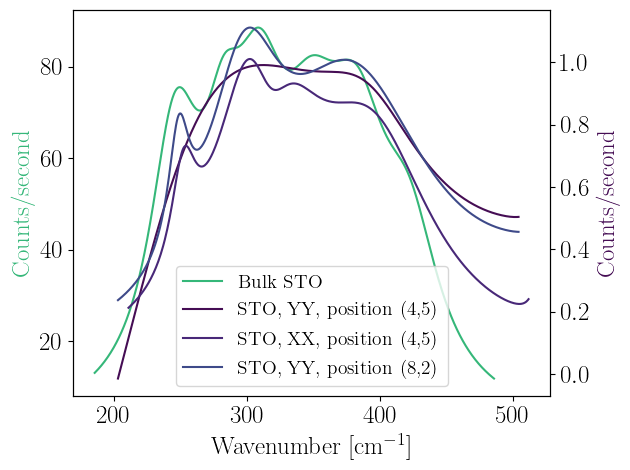

In [59]:
# comparison bulk to membrane

von0, zu0 = 200, -1

ddd1 = [

    [comp["x sto BULK"][von0:zu0], comp["y sto BULK"][von0:zu0], "Bulk STO", c_scheme[6], "-", ""],
]

von1, zu1 = 0, -500
von2, zu2 = 0, -500
von3, zu3 = 0, -500


ddd2 = [
    [comp["x sto yy 4 5"][von1:zu1], comp["y sto yy 4 5"][von1:zu1], "STO, YY, position (4,5)", c_scheme[0], "-", ""],

    [comp["x sto xx 4 5"][von2:zu2], comp["y sto xx 4 5"][von2:zu2], "STO, XX, position (4,5)", c_scheme[1], "-", ""],

    [comp["x sto xx 8 2"][von3:zu3], comp["y sto xx 8 2"][von3:zu3], "STO, YY, position (8,2)", c_scheme[2], "-", ""],

]


p_func.plot_with_two_axes_with_N_curves_with_VERTICAL_lines(ddd1, ddd2, name_x=r"Wavenumber [cm$^{-1}$]", name_y1="Counts/second", name_y2="Counts/second", col_ax1 = c_scheme[6], col_ax2= c_scheme[0], plot_title="", filename_to_save="Figures/comparison_bulk_membrane", marker_size="5", font_size=18, legend_size=14, legend_local="best", vlines=None, x_ticks=True)





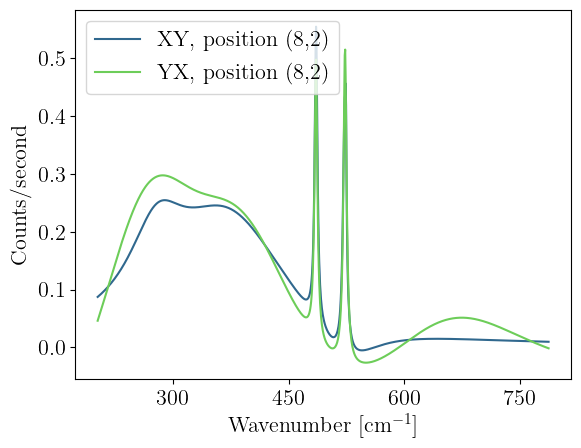

In [58]:
# comparison (8,2) and (4,5), XX and YY


von1, zu1 = 0, -1
von2, zu2 = 0, -1
von3, zu3 = 0, -1


# x sto xy 8 2	y sto xy 8 2	x sto yx 8 2	y sto yx 8 2

ddd_membranes_XY_YX = [
    [comp["x sto xy 8 2"][von1:zu1], comp["y sto xy 8 2"][von1:zu1], "XY, position (8,2)", c_scheme[3], "-", ""],

    [comp["x sto yx 8 2"][von2:zu2], comp["y sto yx 8 2"][von2:zu2], "YX, position (8,2)", c_scheme[7], "-", ""],

]


# p_func.plot_with_two_axes_with_N_curves_with_VERTICAL_lines(ddd1, ddd2, name_x=r"Wavenumber [cm$^{-1}$]", name_y1="Counts/second", name_y2="Counts/second", col_ax1 = c_scheme[6], col_ax2= c_scheme[0], plot_title="", filename_to_save="Figures/comparison_bulk_membrane", marker_size="5", font_size=18, legend_size=14, legend_local="best", vlines=None, x_ticks=True)


p_func.plot_with_one_axis(ddd_membranes_XY_YX, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Counts/second", plot_title="", filename_to_save=f"Figures/comparison membranes xy and yx", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, x_ticks_numstyle="plain", line_width=1.5) # [data_x, data_y, label, colorr, line_style, marker_type] 


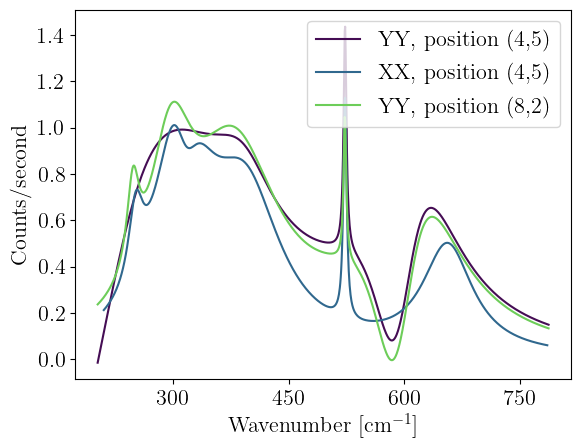

In [57]:
# comparison XY and YX


von1, zu1 = 0, -1
von2, zu2 = 0, -1
von3, zu3 = 0, -1


ddd_membranes = [
    [comp["x sto yy 4 5"][von1:zu1], comp["y sto yy 4 5"][von1:zu1], "YY, position (4,5)", c_scheme[0], "-", ""],

    [comp["x sto xx 4 5"][von2:zu2], comp["y sto xx 4 5"][von2:zu2], "XX, position (4,5)", c_scheme[3], "-", ""],

    [comp["x sto xx 8 2"][von3:zu3], comp["y sto xx 8 2"][von3:zu3], "YY, position (8,2)", c_scheme[7], "-", ""],
]


# p_func.plot_with_two_axes_with_N_curves_with_VERTICAL_lines(ddd1, ddd2, name_x=r"Wavenumber [cm$^{-1}$]", name_y1="Counts/second", name_y2="Counts/second", col_ax1 = c_scheme[6], col_ax2= c_scheme[0], plot_title="", filename_to_save="Figures/comparison_bulk_membrane", marker_size="5", font_size=18, legend_size=14, legend_local="best", vlines=None, x_ticks=True)


p_func.plot_with_one_axis(ddd_membranes, name_x=r"Wavenumber [cm$^{-1}$]", name_y="Counts/second", plot_title="", filename_to_save=f"Figures/comparison membranes", marker_size="5", font_size=16, offset_text_size=16, legend_local="best", legend_size=16, x_ticks_limit=5, x_ticks_numstyle="plain", line_width=1.5) # [data_x, data_y, label, colorr, line_style, marker_type] 
